K-means with color histograms for  videos classification

In [15]:
import os
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Function to load videos from a directory
def load_videos_from_directory(directory, max_frames=100):
    video_data = []
    labels = []

    # Extract label from directory name
    label = os.path.basename(directory)

    for filename in os.listdir(directory):
        if filename.endswith('.mp4'):
            file_path = os.path.join(directory, filename)

            # Read video frames
            cap = cv2.VideoCapture(file_path)
            frames = []

            frame_count = 0
            while True:
                ret, frame = cap.read()
                if not ret or frame_count >= max_frames:
                    break

                # Preprocess frame (resize, normalize, etc.)
                frame = cv2.resize(frame, (64, 64))
                frame = frame.astype("float32") / 255.0
                frames.append(frame)

                frame_count += 1

            cap.release()

            # Pad or truncate frames to max_frames
            frames = frames + [np.zeros_like(frames[0])] * (max_frames - len(frames))

            video_data.append(frames)
            labels.append(label)

    return np.array(video_data), np.array(labels)

# Specify directories
input_video_dir = "/Users/sudachk/PacktPublishing/DataLabelling/ch08/kmeans/kmeans_input"

# Load video data and get the maximum number of frames
input_video, _ = load_videos_from_directory(input_video_dir)

# Function to extract color histogram features from frames
def extract_histogram_features(frames):
    histogram_features = []
    for frame in frames:
        # Convert frame to HSV color space
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # Calculate the histogram for each channel
        hist_h = cv2.calcHist([hsv], [0], None, [256], [0, 256])
        hist_s = cv2.calcHist([hsv], [1], None, [256], [0, 256])
        hist_v = cv2.calcHist([hsv], [2], None, [256], [0, 256])

        # Concatenate the histograms into a single feature vector
        hist_features = np.concatenate([hist_h.flatten(), hist_s.flatten(), hist_v.flatten()])
        histogram_features.append(hist_features)

    return np.array(histogram_features)

# Extract histogram features for each video
hist_features = extract_histogram_features(input_video.reshape(-1, 64, 64, 3))

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(hist_features)

# Use K-means to cluster the features into 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
predicted_labels = kmeans.fit_predict(scaled_features)
print("Predicted Labels:", predicted_labels)




Predicted Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
import os
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ... (previous code)

# Flatten the video_data array to iterate through frames
flattened_video_data = input_video.reshape(-1, input_video.shape[-3], input_video.shape[-2], input_video.shape[-1])

# Create two separate output directories for clusters
output_directory_0 = "/Users/sudachk/PacktPublishing/DataLabelling/ch08/kmeans/kmeans_output/Cluster_0"
output_directory_1 = "/Users/sudachk/PacktPublishing/DataLabelling/ch08/kmeans/kmeans_output/Cluster_1"
os.makedirs(output_directory_0, exist_ok=True)
os.makedirs(output_directory_1, exist_ok=True)

# Iterate through each frame, save frames in the corresponding cluster folder
for idx, (frame, predicted_label) in enumerate(zip(flattened_video_data, predicted_labels)):
    cluster_folder = output_directory_0 if predicted_label == 0 else output_directory_1

    frame_filename = f"video_frame_{idx}.png"
    frame_path = os.path.join(cluster_folder, frame_filename)
    cv2.imwrite(frame_path, (frame * 255).astype(np.uint8))


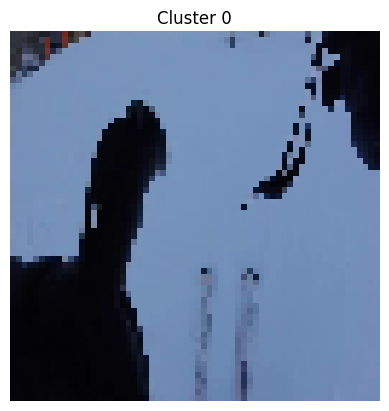

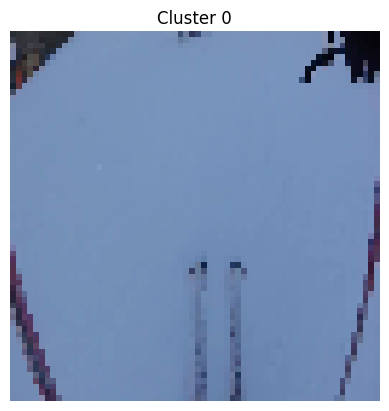

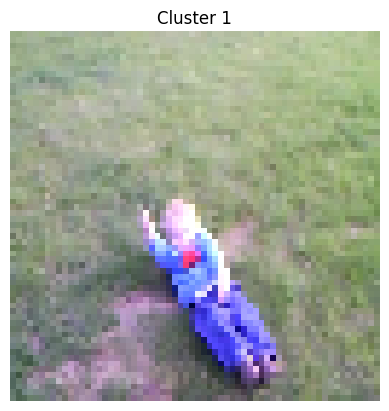

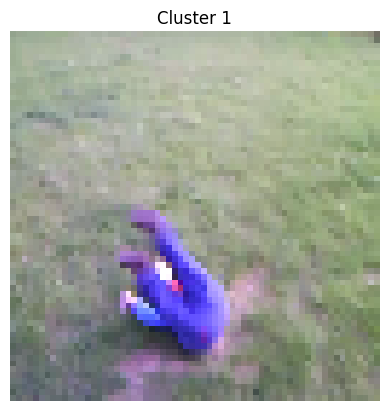

In [17]:

# Visualize a few frames from each cluster
num_frames_to_visualize = 2
for cluster_label in range(2):
    cluster_folder = os.path.join("./kmeans/kmeans_output", f"Cluster_{cluster_label}")
    frame_files = os.listdir(cluster_folder)[:num_frames_to_visualize]

    for frame_file in frame_files:
        frame_path = os.path.join(cluster_folder, frame_file)
        frame = cv2.imread(frame_path)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        plt.imshow(frame)
        plt.title(f"Cluster {cluster_label}")
        plt.axis("off")
        plt.show()
